In [1]:
import datasets
import utils
import gender

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [3]:
data = "segmentation01"
data_dir = "data/Segmentation01_RGB"
utils.split_train_to_val(data, data_dir, val_ratio=0.1)

In [15]:
# c_transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.CenterCrop(224),
# ])


In [4]:
dataset_train = datasets.Segmentation01(data_dir, "train")
dataset_val = datasets.Segmentation01(data_dir, "val")
dataset_test = datasets.Segmentation01(data_dir, "test")

dataset_train_dataloader = DataLoader(dataset_train, batch_size=4, shuffle=True, num_workers=4)
dataset_val_dataloader = DataLoader(dataset_val, batch_size=4, shuffle=True, num_workers=4)
dataset_test_dataloader = DataLoader(dataset_test, batch_size=4, shuffle=True, num_workers=4)

In [5]:
print("Training dataset size: ", len(dataset_train))
print("Valication dataset size: ", len(dataset_val))
print("Testing dataset size: ", len(dataset_test))

Training dataset size:  45
Valication dataset size:  5
Testing dataset size:  10


In [15]:
batch = list(iter(dataset_train_dataloader))[0]

In [17]:
batch[1][1].max(), batch[1][1].min()

(tensor(255, dtype=torch.uint8), tensor(0, dtype=torch.uint8))

Feature batch shape: 4
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


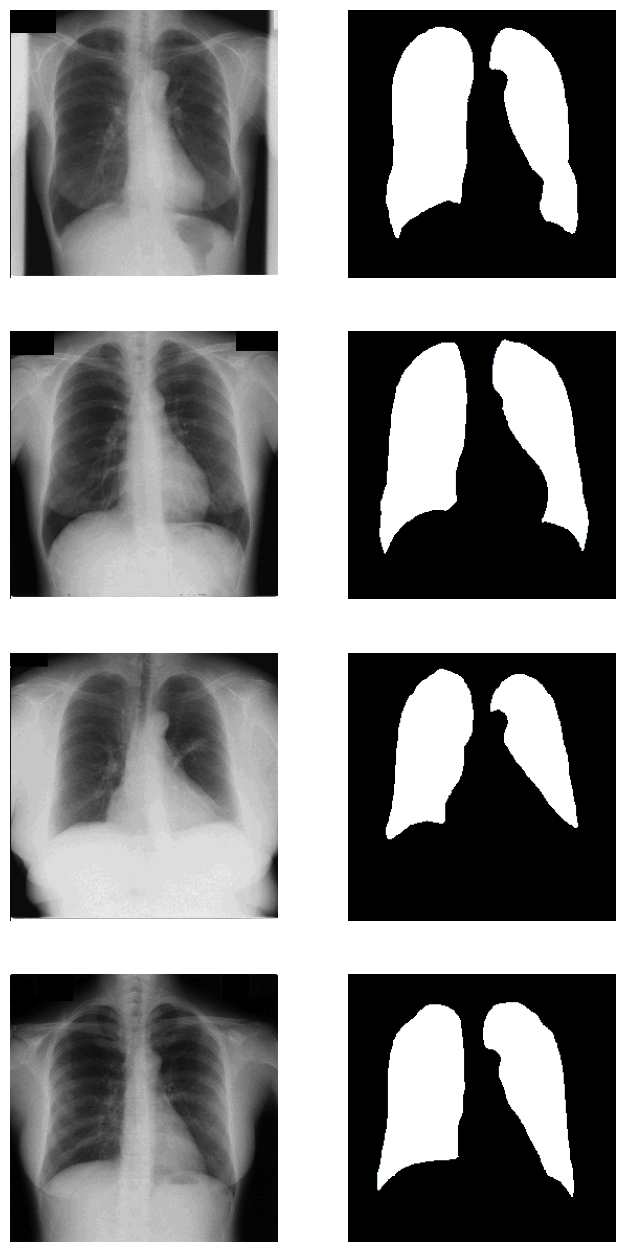

In [14]:
batch = list(iter(dataset_train_dataloader))
batch_array = batch[0][0].permute(0, 2, 3, 1).numpy()
batch_array_y = batch[0][1].permute(0, 2, 3, 1).numpy()
print(f"Feature batch shape: {batch_array.shape[0]}")
fig, axs = plt.subplots(batch_array.shape[0], 2, figsize=(2*batch_array.shape[0],batch_array.shape[0]*batch_array.shape[0]))
for i in range(batch_array.shape[0]):
    print(batch_array[i].shape)
    axs[i,0].imshow(batch_array[i], cmap=plt.cm.bone)
    axs[i,0].axis('off')
    axs[i,1].imshow(batch_array_y[i], cmap=plt.cm.bone)
    axs[i,1].axis('off')
plt.show()
